## Libraries ##

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

## reading the Zoo dataset ##

In [8]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## checking the null values ##

In [11]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

## There are no null values ##

<Axes: >

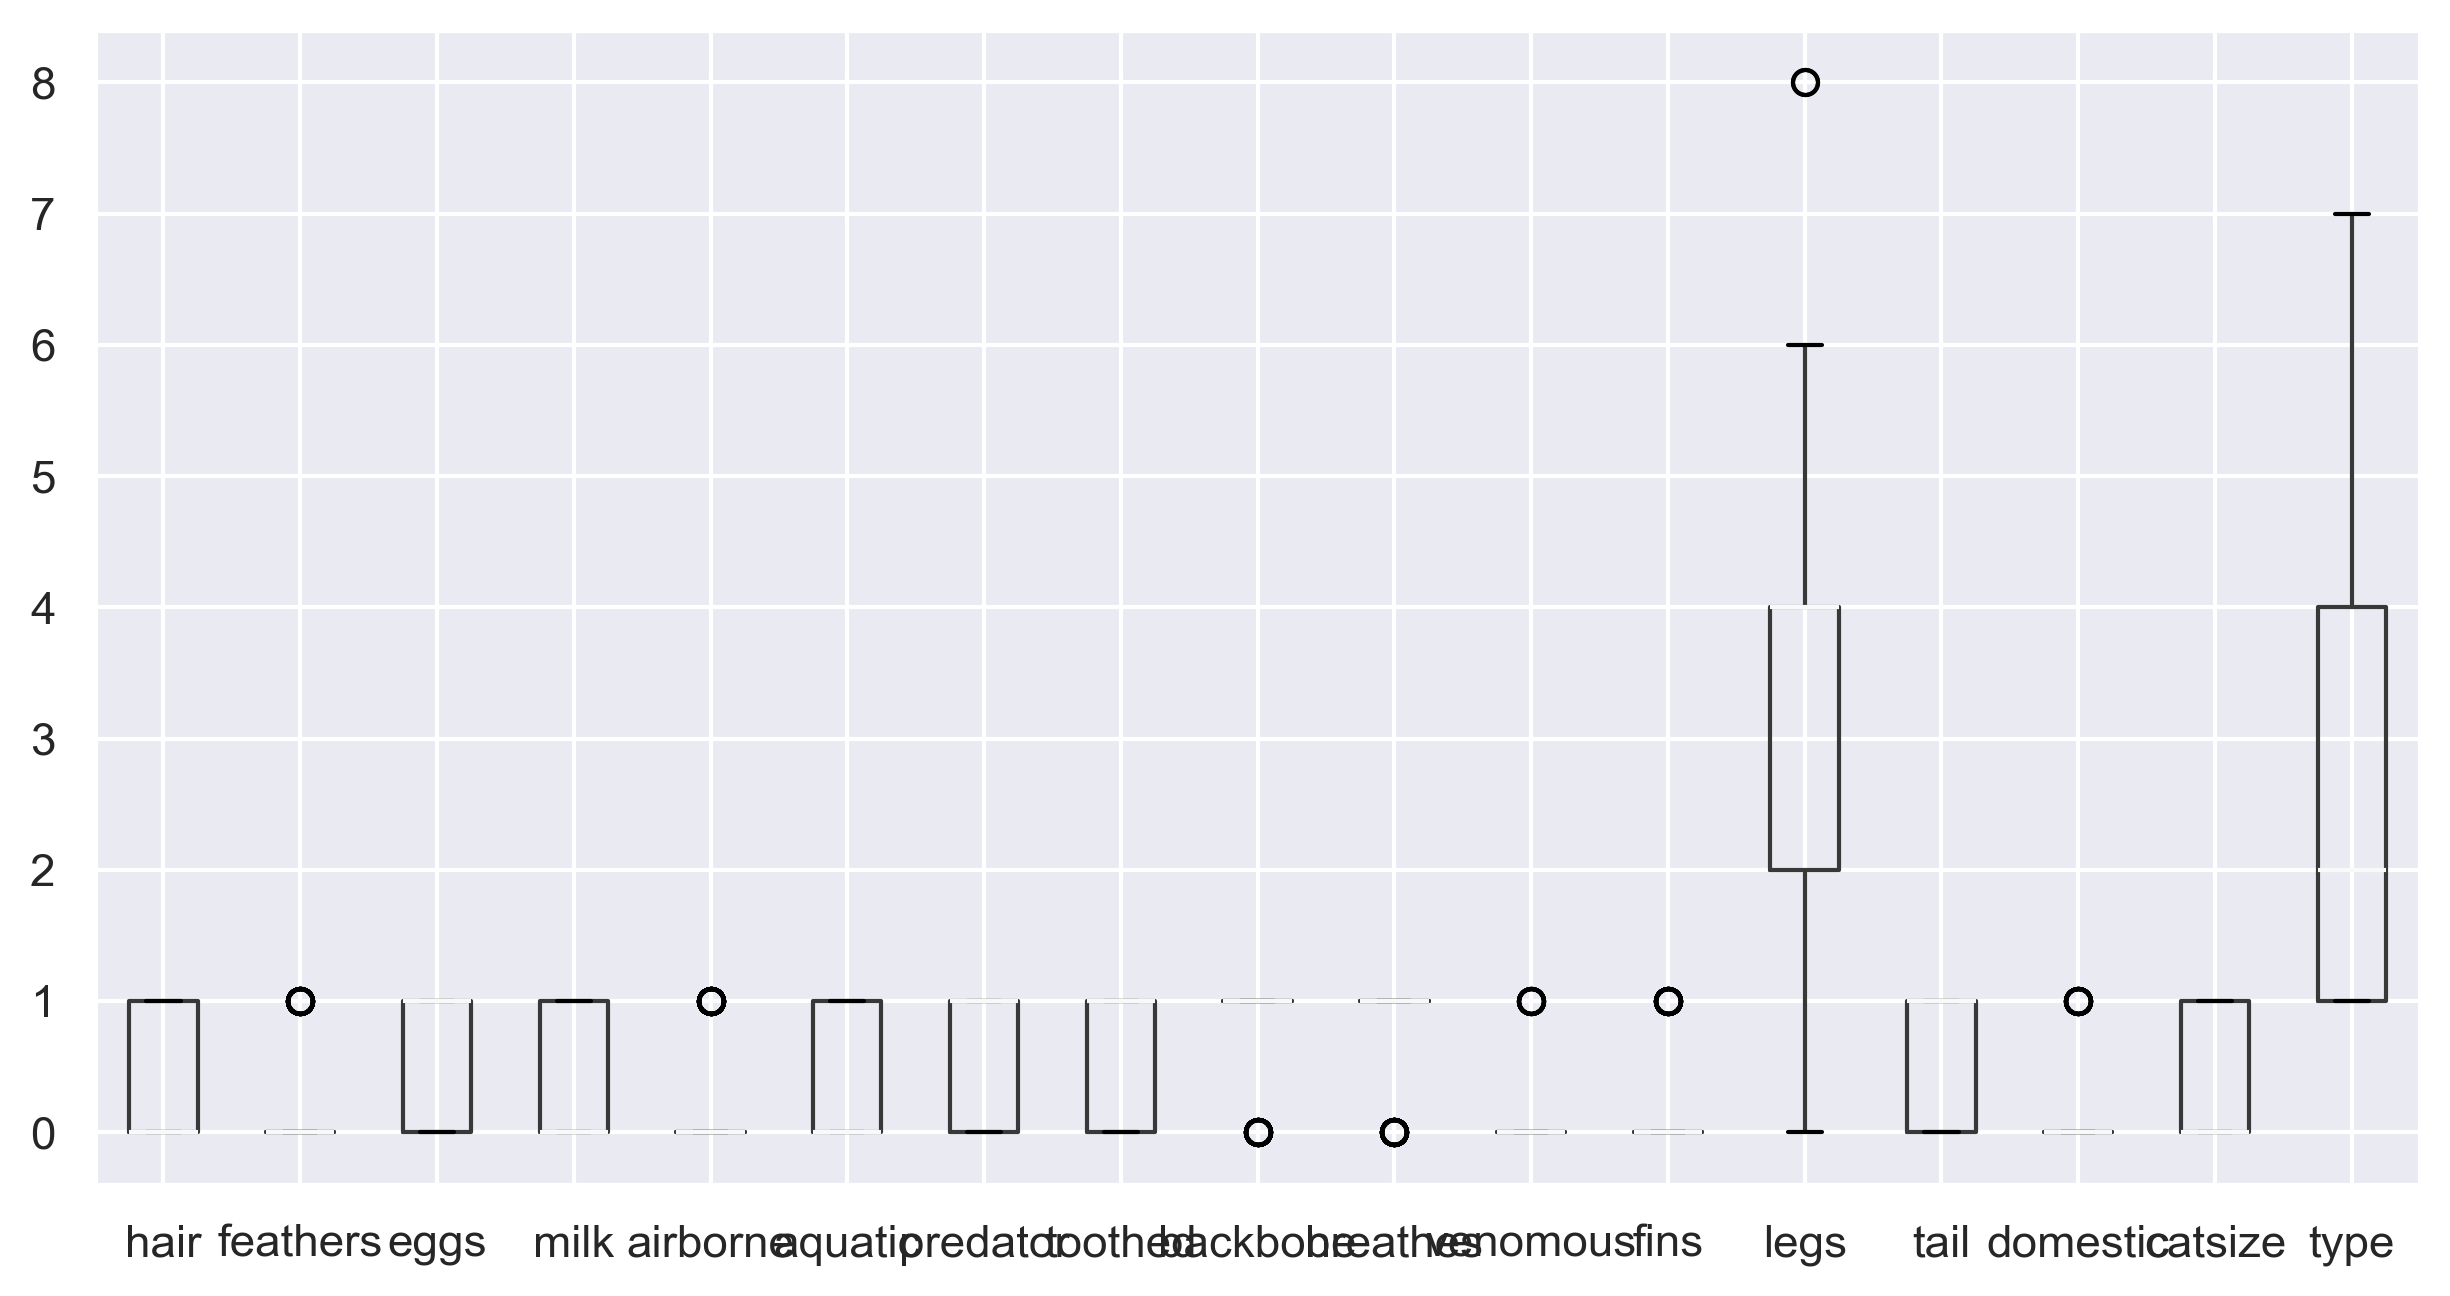

In [13]:
df.boxplot()

## Encoding the animal name column ##

In [15]:
Le = LabelEncoder()

In [16]:
df['animal name'] = Le.fit_transform(df['animal name'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
x = df.iloc[:,:-1]
y = df['type']

In [18]:
x

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


## Scaling the data using standard scaler ##

In [20]:
sc = StandardScaler()

In [21]:
x = sc.fit_transform(x)

## splitting the data in to training and testing ##

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

## Applying KNN algorithm ##

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.9625, 0.9523809523809523)

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



## We can see that the training and testing accuracy is good and the model is not overfitted. ##
## I will try to fine tune the model further and see the difference. ##

In [28]:
train_acc = []
test_acc = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [29]:
train_acc

[1.0,
 0.95,
 0.9625,
 0.95,
 0.95,
 0.9375,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.8875,
 0.9,
 0.875,
 0.875]

In [30]:
test_acc

[1.0,
 0.8571428571428571,
 0.9523809523809523,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571]

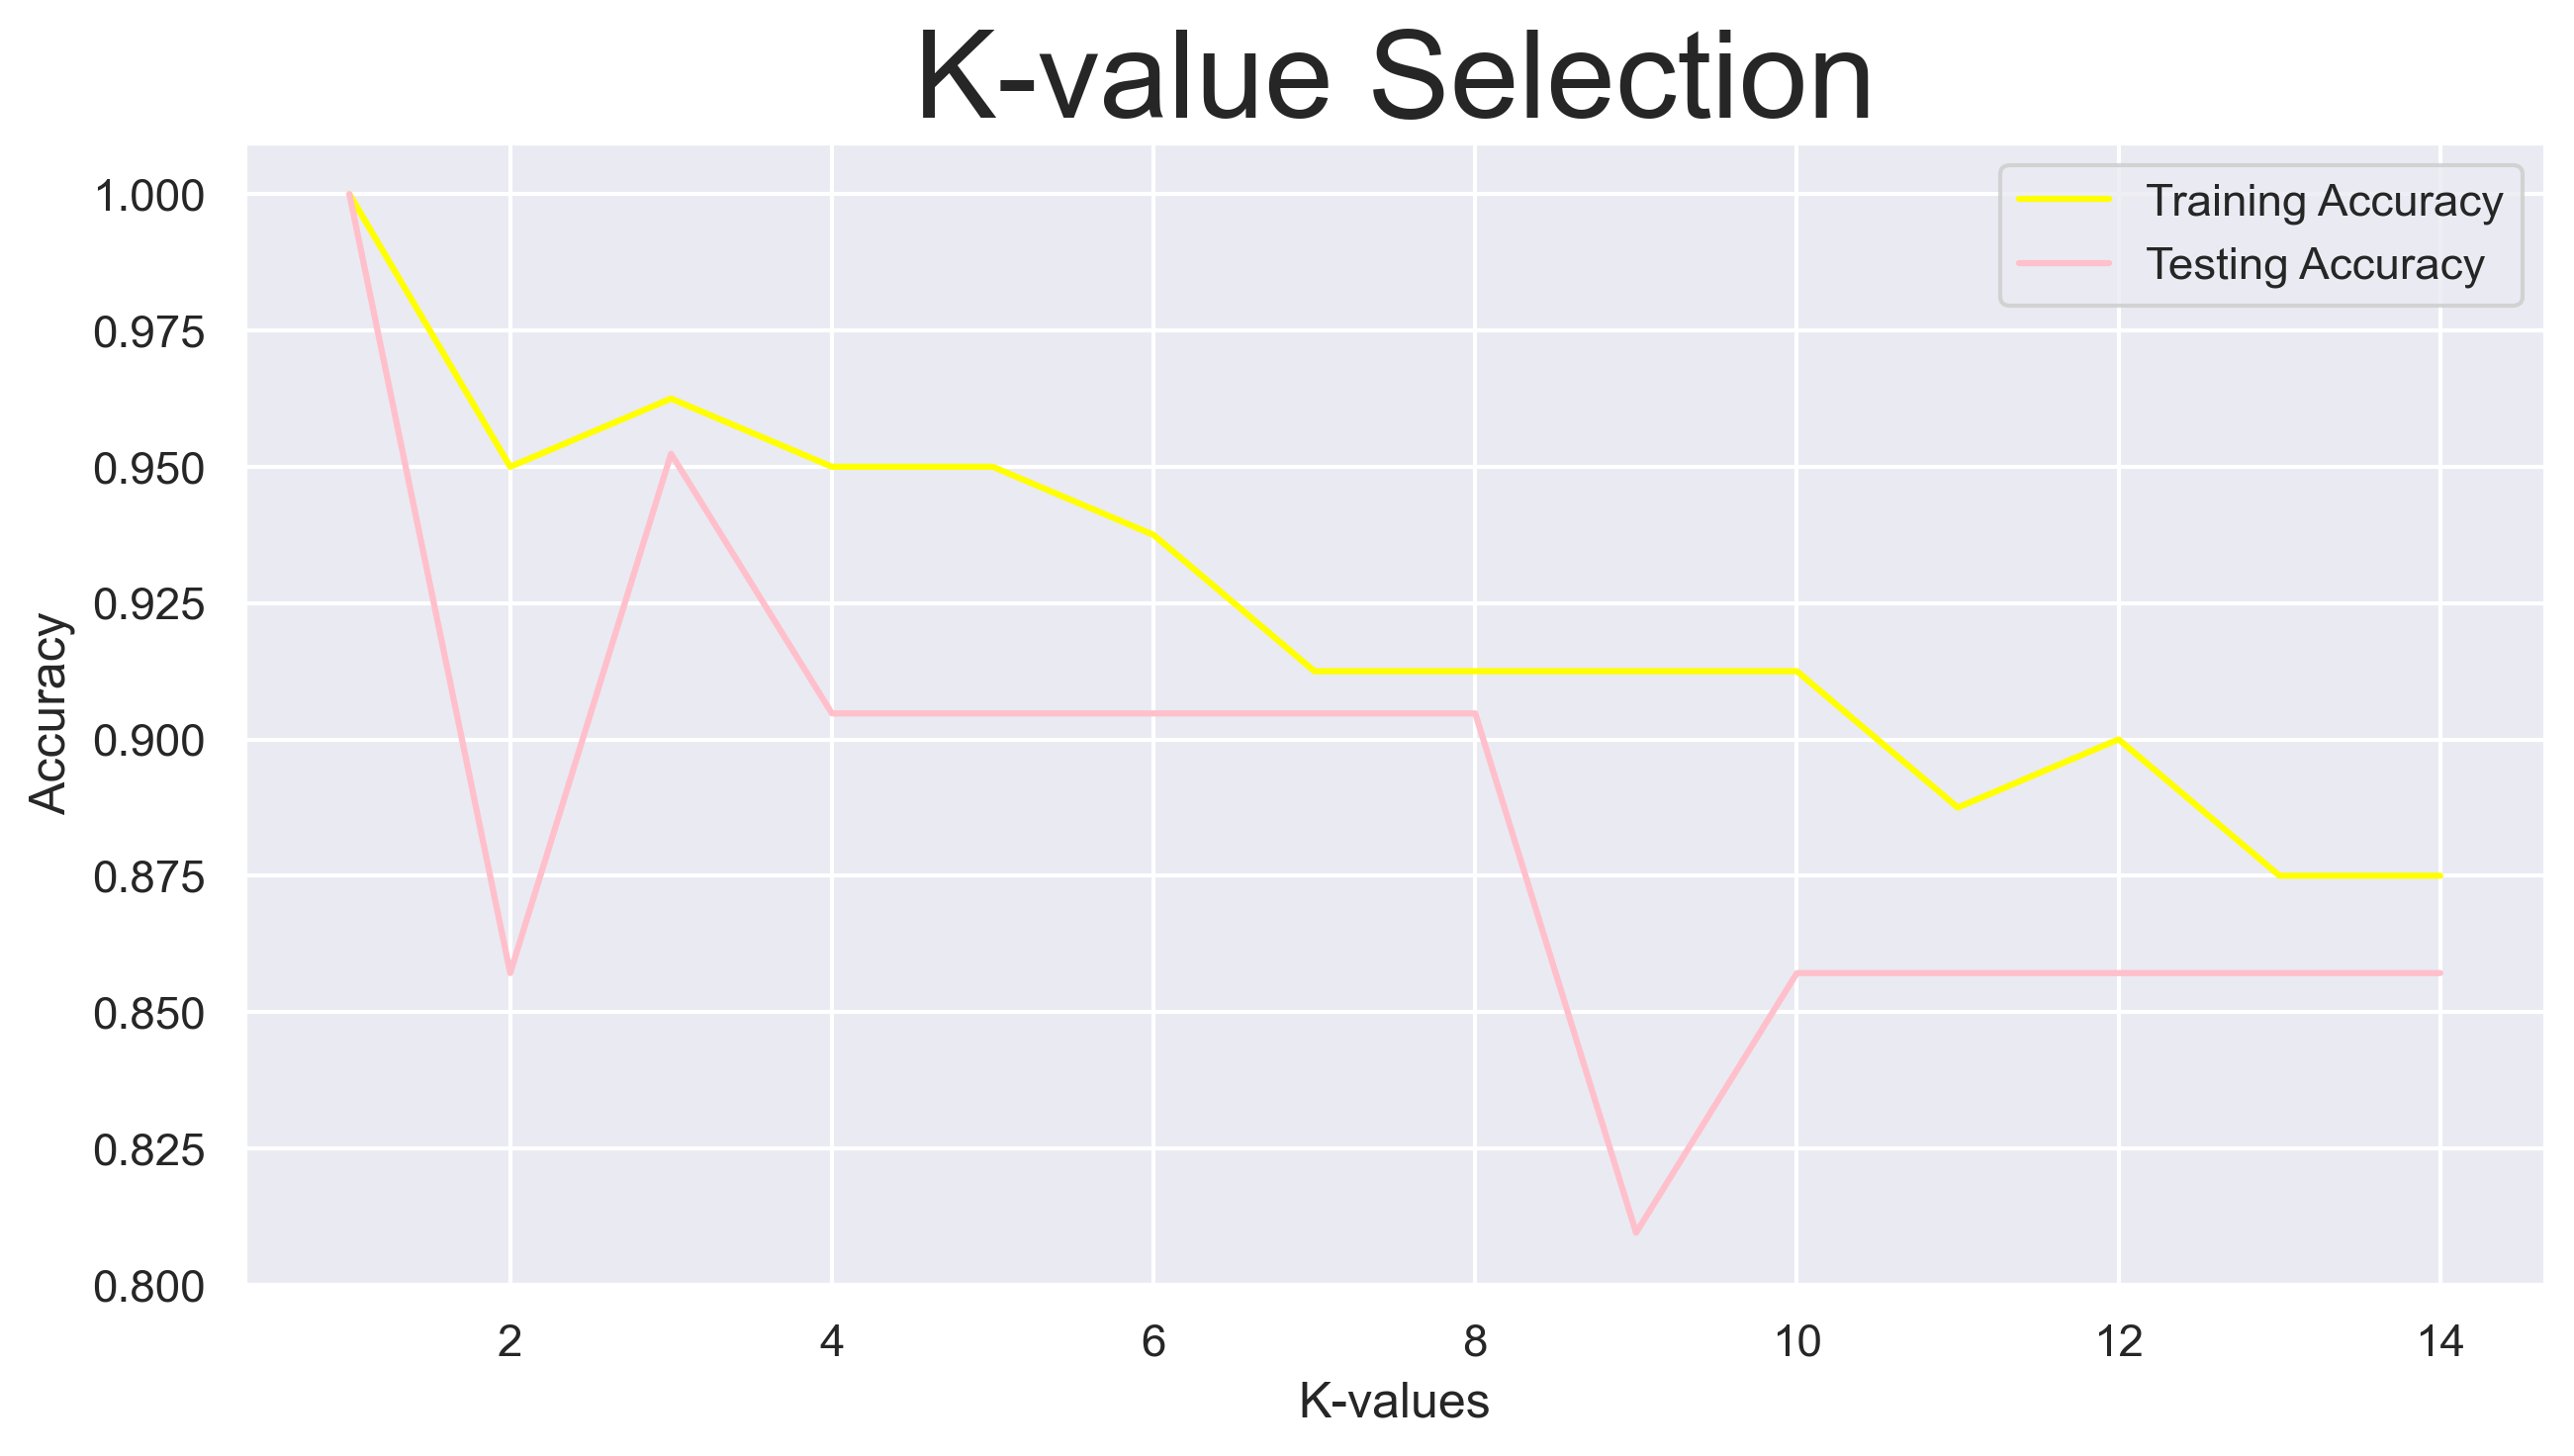

In [31]:
plt.plot(range(1,15), train_acc, color = 'yellow', label = 'Training Accuracy')
plt.plot(range(1,15), test_acc, color = 'pink', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

## from the above plot we can see that if we take 3 as K value , we get highest accuracy and the difference ##
## between training and testing accuracy is only 1. At K value 8 again the model is generalised however ##
## the accuracy is reduced to approximately 91%. ##
## we are using 3 as K value and Euclidean Distance as distance metric ##

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.9625
Test: 0.9523809523809523


In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



In [35]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.9125
Test: 0.9047619047619048


In [36]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.90        21
   macro avg       0.70      0.64      0.66        21
weighted avg       0.91      0.90      0.90        21



## since this dataset has large number of features, we will try to visualise decision boundries for  two features ##
## legs and aquatic ##

In [38]:
data = pd.read_csv('Zoo.csv')

In [39]:
X = data[['legs', 'aquatic']].values  
y = data['type'].values  

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)  


KNeighborsClassifier(n_neighbors=3)

In [69]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


In [81]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  
Z = Z.reshape(xx.shape)  


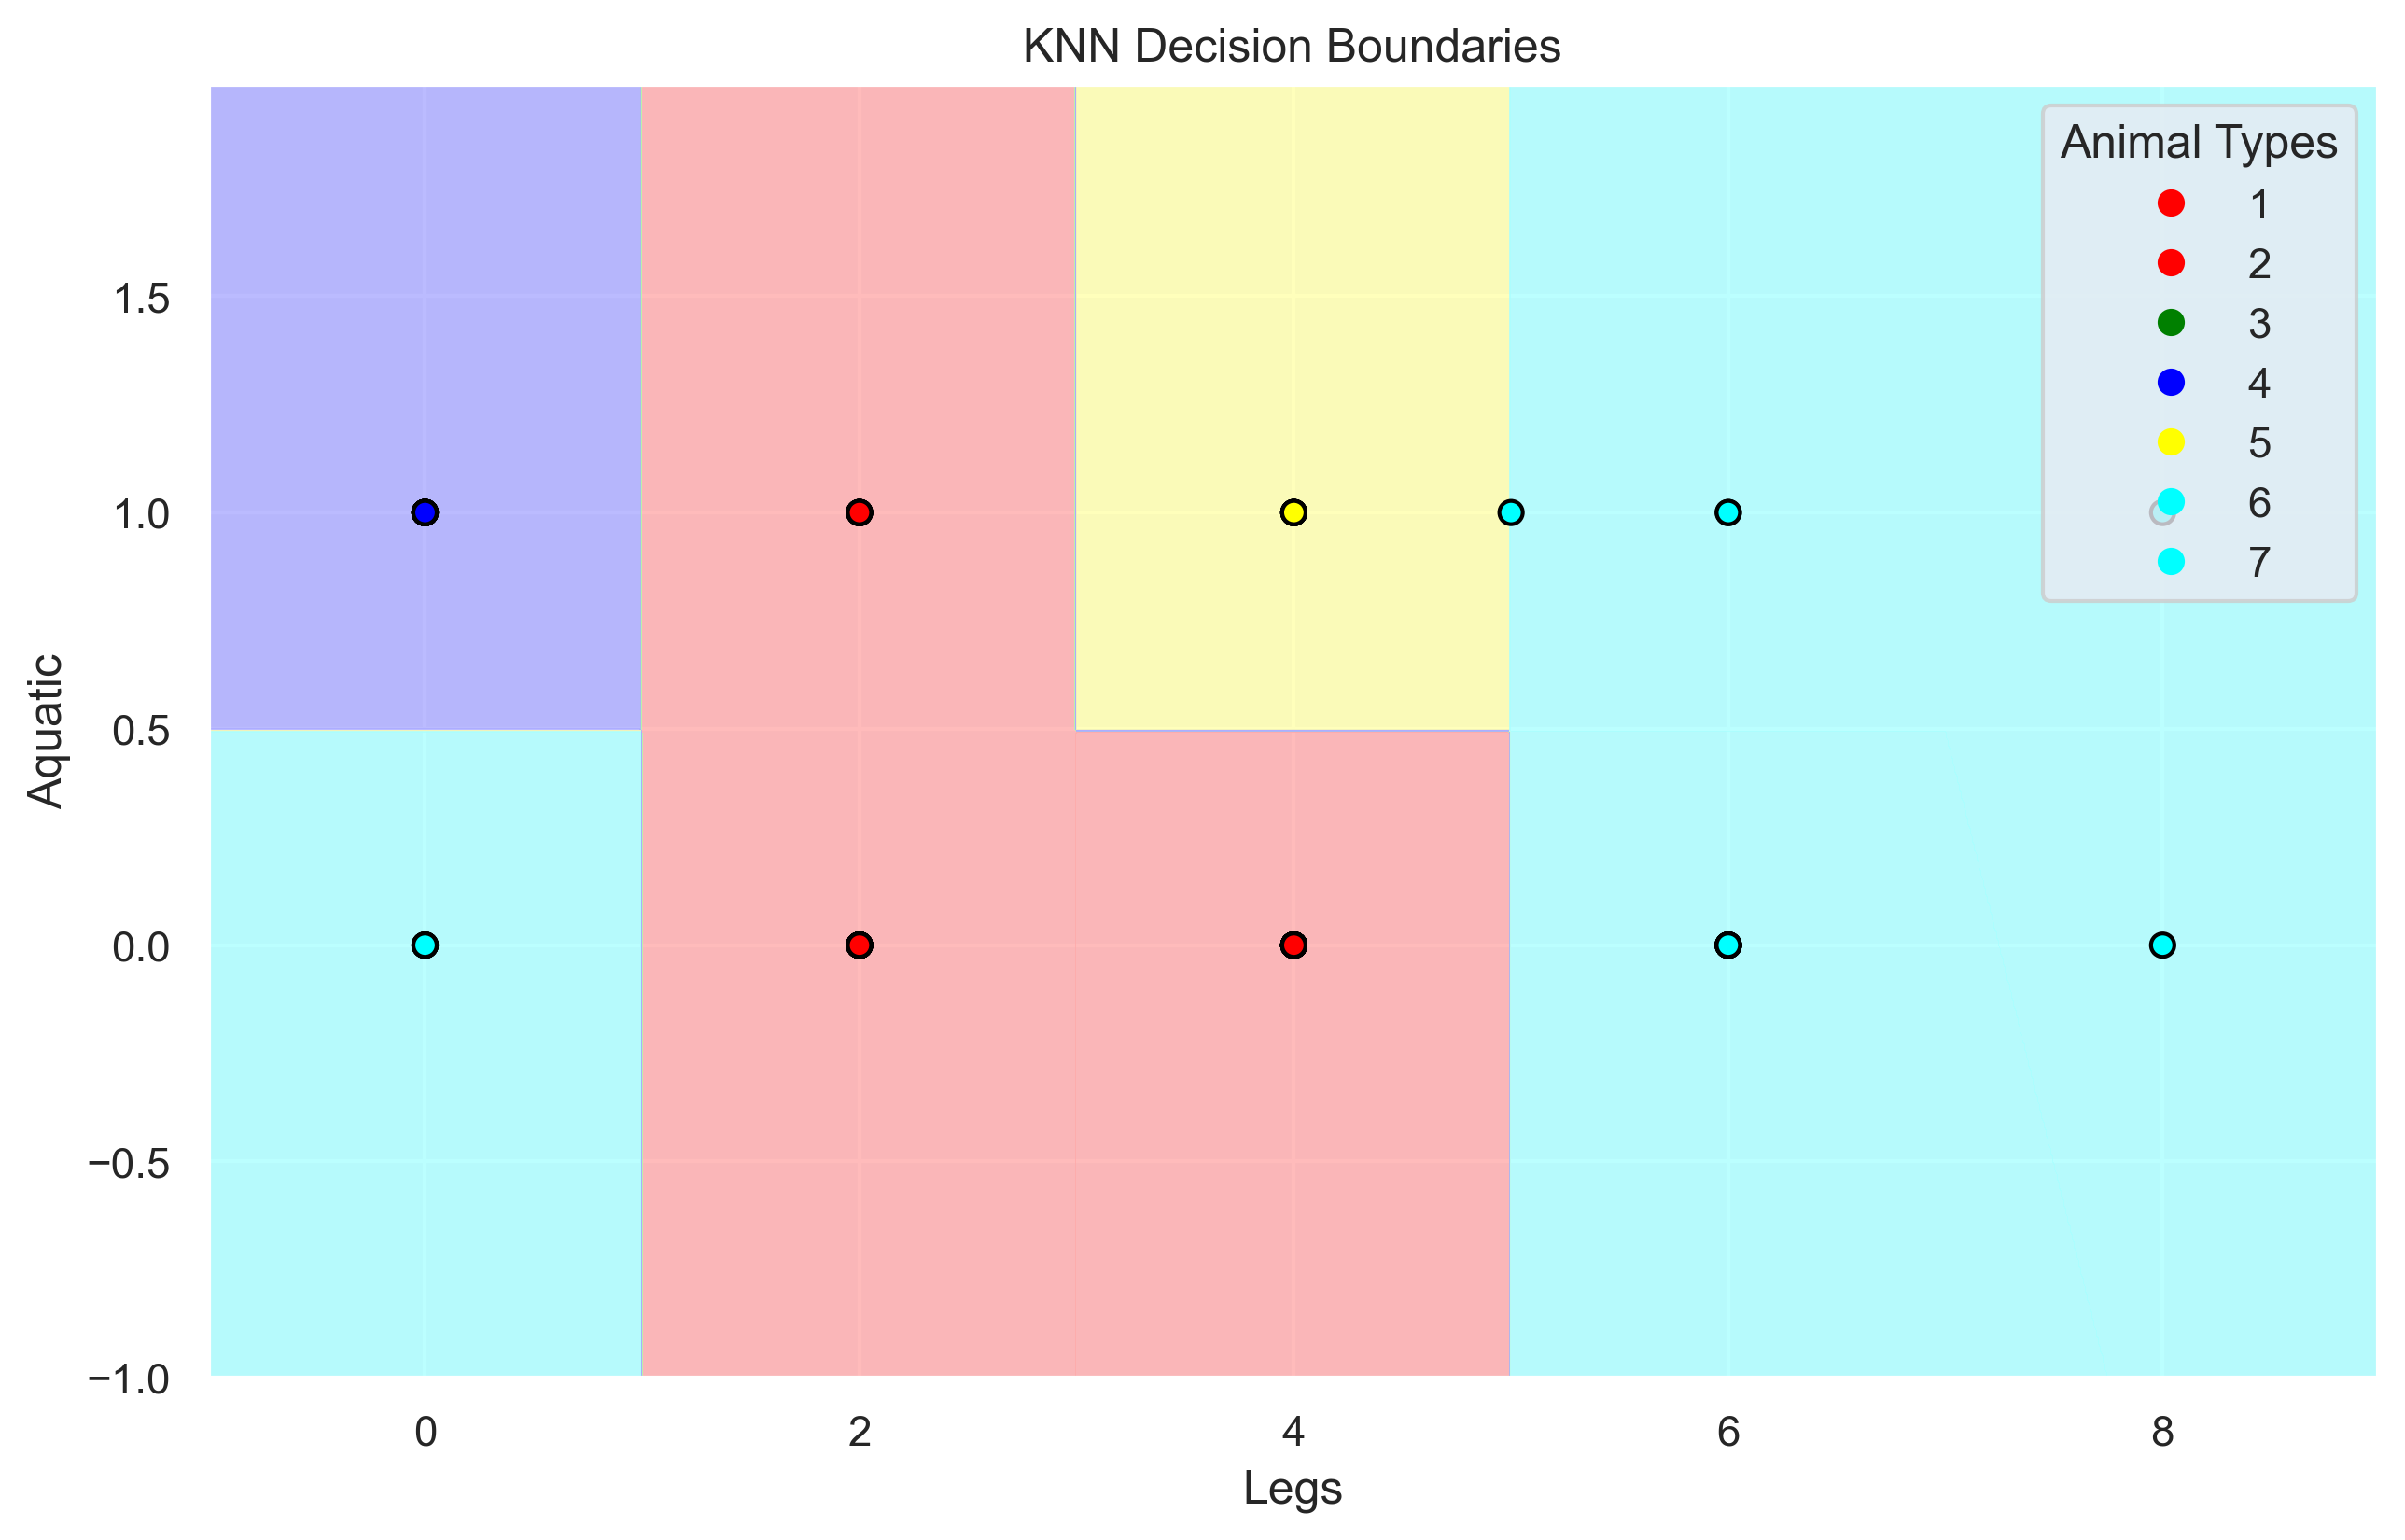

In [82]:
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#AAFFFF'])
cmap_bold = ListedColormap(['red', 'green', 'blue', 'yellow', 'cyan'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)  # Plot the decision boundary
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')  # Scatter plot
plt.xlabel("Legs")
plt.ylabel("Aquatic")
plt.title("KNN Decision Boundaries")
plt.legend(*scatter.legend_elements(), title="Animal Types")  # Add legend
plt.show()  # Display the plot


## Answer 1 ##
## Number of neighbours (n_neighbours) small number of neighbours makes model sensitive to outliers however large number of neighbours ##
## may cause overfitting. ##
## Distance Metric : Euclidean Distance (default): Straight-line distance between two points. ##
## Manhattan Distance: Distance calculated as the sum of the absolute differences. ## 

## Answer 2 ## 
## We can use following distance matrices ##
## Euclidean Distance ##
## Manhattan Distance ##
## Minkowski Distance ##